# Моделирование случайных величин

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import math

Дано распределение Рэлея: 

In [79]:
%%latex
\begin{align}
p(x) = \frac{x}{\sigma^2} \cdot \exp(\frac{-x^2}{2 \cdot \sigma^2}), x>=0, \sigma>0 \\
m = \sigma \cdot \sqrt{\frac{\pi}{2}} \\
D = (2 - \frac{\pi}{2})\cdot \sigma^2\\
\sigma\sim\sigma \cdot \sqrt{-2\cdot\ln{\alpha}}
\end{align}

<IPython.core.display.Latex object>

In [37]:
n = 10000 #число реализаций равномерной случайной величины

In [38]:
r = np.random.uniform(size=n) #генерируем реализации РСВ
sigma = 2 

In [39]:
x = sigma * np.sqrt(-2*np.log(r)) # генерируем реализации СВ на основе алгоритма

In [40]:
N = list(range(1,n+1)) #числа реализаций для вычисления выборочного среднего
z = np.zeros(n)
X = np.vstack([x.transpose()]*n)
X_ = np.tril(X)

In [41]:
ms = X_.sum(1)/ N # выборочные средние
m = sigma * math.sqrt(math.pi/2)# матожидание

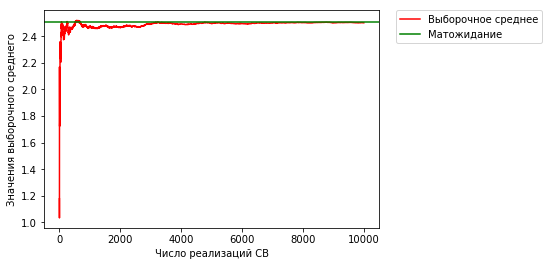

In [51]:
plt.plot(N,ms,'r',label = 'Выборочное среднее')
plt.axhline(m,color = 'g', label = 'Матожидание')
plt.xlabel('Число реализаций СВ')
plt.ylabel('Значения выборочного среднего')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("figure1.png",bbox_inches='tight')
plt.show()

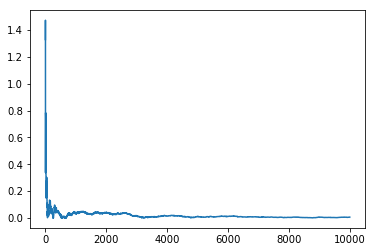

In [43]:
m_loss = np.abs(ms - m)
plt.plot(N,m_loss)
plt.show()

In [44]:
vd = np.tril(np.square(X - ms)).sum(1)/N #значения выборочной дисперсии
d = (2 - math.pi/2)*sigma**2 #дисперсия

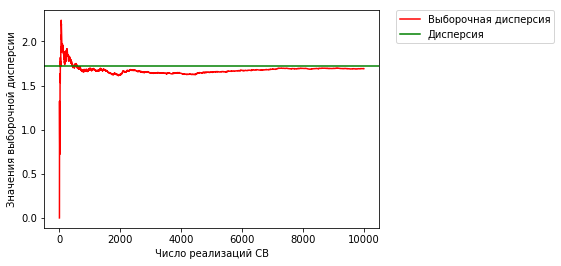

In [60]:
plt.plot(N,vd,'r',label = 'Выборочная дисперсия')
plt.axhline(d,color = 'g', label = 'Дисперсия')
plt.xlabel('Число реализаций СВ')
plt.ylabel('Значения выборочной дисперсии')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("figure2.png",bbox_inches='tight')
plt.show()

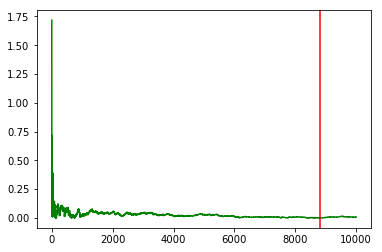

In [11]:
d_loss = np.abs(vd-d)
x_position = np.where(d_loss == np.min(d_loss))
plt.plot(N,d_loss,'g')
plt.axvline(x_position,color = 'r')
plt.show()

In [12]:
t=np.arange(np.min(x),np.max(x),0.05)
p = t/(sigma**2) * np.exp(-(t**2)/(2*sigma**2)) #плотность вероятности

In [13]:
num_of_bins = math.ceil(np.max(x) - np.min(x))

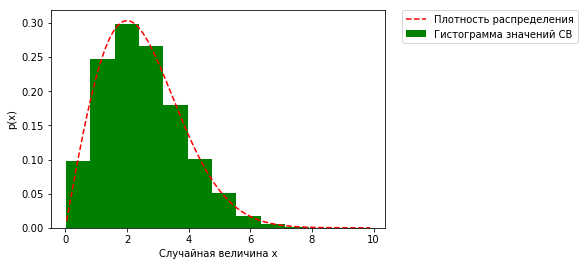

In [59]:
plt.hist(x,normed = 1, facecolor = 'green', label = 'Гистограмма значений СВ')
plt.plot(t,p,'r--',label = 'Плотность распределения')
plt.xlabel('Случайная величина x')
plt.ylabel('p(x)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("figure3.png",bbox_inches='tight')
plt.show()